In [ ]:
# pip install citipy

In [2]:
# Dependencies and setup
import requests
from pprint import pprint
from citipy import citipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
from scipy.stats import linregress

# Import API keys
from api_keys import weather_api_key

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

In [4]:
# Set up base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

In [5]:
# Create a dictionary and loop variable
citydict = {}
record = 1
setnum = 1

# Create a loop to call for each city
for item in cities:
    # Set up query URL
    query_url = url + "appid=" + weather_api_key + "&q=" + item + "&units=imperial"
    # Get response into JSON
    cityresponse = requests.get(query_url)
    cityjson = cityresponse.json()
    # Log each city and account for exceptions
    try:
        # Collect lat/long, Temp (F), Humidity (%), Cloudiness (%) and wind speed (mph)
        citydict[item] = [cityjson['coord']['lat'],
                      cityjson['coord']['lon'],
                      cityjson['main']['temp_max'],
                      cityjson['main']['humidity'],
                      cityjson['clouds']['all'],
                      cityjson['wind']['speed'],
                      cityjson['sys']['country'],
                      cityjson['dt']
                     ]
        print(f"Processing record {record} of set {setnum} | {item}")
        record += 1
        # use time.sleep(60) after every set of 50 cities to avoid exceeding API call limit
        if record % 50 == 0:
            setnum += 1
            time.sleep(60)
            print("(wait - avoid API call limit)")
    # Exception if city isn't found
    except:
        print(f"{item} not found. Skipping...")

print("----------Job complete!----------")

Processing record 1 of set 1 | lola
Processing record 2 of set 1 | atuona
Processing record 3 of set 1 | port blair
illoqqortoormiut not found. Skipping...
Processing record 4 of set 1 | dikson
Processing record 5 of set 1 | guerrero negro
Processing record 6 of set 1 | mount isa
Processing record 7 of set 1 | kawalu
Processing record 8 of set 1 | kapaa
Processing record 9 of set 1 | iqaluit
Processing record 10 of set 1 | barrow
amderma not found. Skipping...
Processing record 11 of set 1 | bluff
Processing record 12 of set 1 | hermanus
Processing record 13 of set 1 | ushuaia
Processing record 14 of set 1 | gospic
Processing record 15 of set 1 | tuktoyaktuk
Processing record 16 of set 1 | mar del plata
Processing record 17 of set 1 | qaanaaq
Processing record 18 of set 1 | salalah
Processing record 19 of set 1 | ponta do sol
Processing record 20 of set 1 | yarmouth
Processing record 21 of set 1 | sitka
Processing record 22 of set 1 | chegdomyn
Processing record 23 of set 1 | butaritar

Processing record 183 of set 4 | riberalta
bolshiye uki not found. Skipping...
Processing record 184 of set 4 | airai
Processing record 185 of set 4 | laguna
Processing record 186 of set 4 | kinango
Processing record 187 of set 4 | bubaque
Processing record 188 of set 4 | hualmay
Processing record 189 of set 4 | severo-kurilsk
Processing record 190 of set 4 | dhadar
Processing record 191 of set 4 | tocopilla
Processing record 192 of set 4 | taree
Processing record 193 of set 4 | tevaitoa
Processing record 194 of set 4 | tanete
Processing record 195 of set 4 | anloga
Processing record 196 of set 4 | sarangani
Processing record 197 of set 4 | santa cruz
Processing record 198 of set 4 | giyon
Processing record 199 of set 4 | hohhot
(wait - avoid API call limit)
Processing record 200 of set 5 | sawtell
Processing record 201 of set 5 | general roca
Processing record 202 of set 5 | geraldton
Processing record 203 of set 5 | talnakh
Processing record 204 of set 5 | karratha
Processing record 

Processing record 364 of set 8 | college
Processing record 365 of set 8 | hasaki
Processing record 366 of set 8 | verkhnyaya toyma
Processing record 367 of set 8 | fukue
Processing record 368 of set 8 | beyneu
Processing record 369 of set 8 | ouadda
tumannyy not found. Skipping...
Processing record 370 of set 8 | tiarei
Processing record 371 of set 8 | cancuc
Processing record 372 of set 8 | teknaf
Processing record 373 of set 8 | cabedelo
Processing record 374 of set 8 | pirogovo
Processing record 375 of set 8 | garowe
attawapiskat not found. Skipping...
Processing record 376 of set 8 | bambous virieux
Processing record 377 of set 8 | lodwar
Processing record 378 of set 8 | tombouctou
Processing record 379 of set 8 | chumikan
Processing record 380 of set 8 | kalaleh
Processing record 381 of set 8 | saldanha
warqla not found. Skipping...
marmaron not found. Skipping...
Processing record 382 of set 8 | norman wells
Processing record 383 of set 8 | zhezkazgan
Processing record 384 of set

Processing record 541 of set 11 | verkhnetulomskiy
Processing record 542 of set 11 | hanesti
Processing record 543 of set 11 | walbrzych
Processing record 544 of set 11 | roma
Processing record 545 of set 11 | ranau
Processing record 546 of set 11 | mucurapo
Processing record 547 of set 11 | conde
Processing record 548 of set 11 | bafra
Processing record 549 of set 11 | luwuk
(wait - avoid API call limit)
Processing record 550 of set 12 | ust-maya
Processing record 551 of set 12 | gimbi
burica not found. Skipping...
Processing record 552 of set 12 | pozoblanco
Processing record 553 of set 12 | mount gambier
tabiauea not found. Skipping...
Processing record 554 of set 12 | carutapera
Processing record 555 of set 12 | birnin kebbi
Processing record 556 of set 12 | leningradskiy
Processing record 557 of set 12 | prieska
Processing record 558 of set 12 | arrecife
Processing record 559 of set 12 | ust-nera
Processing record 560 of set 12 | kalmar
grand centre not found. Skipping...
Processi

In [6]:
# Convert the dictionary into a dataframe
citydf = pd.DataFrame.from_dict(citydict, orient='index',
                               columns=['Lat','Lon','Max Temp', 'Humidity','Cloudiness','Wind Speed','Country','Date'])
citydf
# Export file as a CSV, without the Pandas index, but with the header
citydf.to_csv("output_data/cities.csv", index=False, header=True)

In [7]:
citydf.describe()

,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,5.780000e+02
mean,20.929378,19.303130,48.619723,75.743945,59.787197,7.226228,1.643256e+09
std,32.878415,90.834646,30.598510,19.017465,40.339650,5.634937,3.507890e+02
min,-54.800000,-179.166700,-43.330000,13.000000,0.000000,0.000000,1.643255e+09
25%,-6.232625,-57.289850,26.045000,65.000000,17.000000,3.115000,1.643255e+09
50%,26.187350,23.410800,57.435000,79.500000,75.000000,5.670000,1.643256e+09
75%,48.163100,101.914975,74.317500,92.000000,100.000000,10.347500,1.643256e+09
max,78.218600,179.316700,96.640000,100.000000,100.000000,33.780000,1.643256e+09


In [7]:
# Find cities with humidity greater than 100%

# The max humidity described above says 100 - so there are no cities in our dataset with humidity > 100%.
## The below code can be run to prove this.

humiditydata = citydf[citydf["Humidity"] > 100].index
len(humiditydata)

0

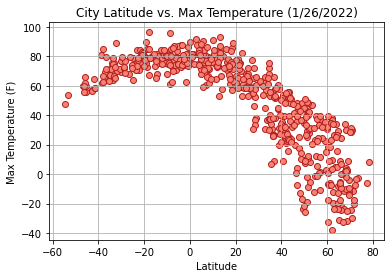

This scatter plot shows that the maximum temperature is much lower at higher latitudes. The max temperature does not drop as much going the other direction from the equator, as the latitude goes lower than zero, down to -60.


In [17]:
# Plot the data
plt.scatter(citydf['Lat'], citydf['Max Temp'], color="salmon", edgecolor="firebrick")
plt.title("City Latitude vs. Max Temperature (1/26/2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig('output_data/plot1.png')
plt.show()
print("This scatter plot shows that the maximum temperature is much lower at\
 higher latitudes. The max temperature does not drop as much going the\
 other direction from the equator, as the latitude goes lower\
 than zero, down to -60.")

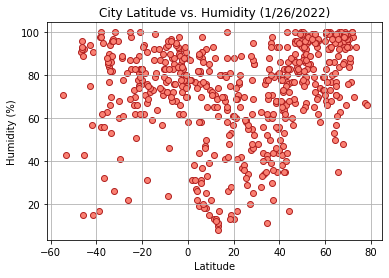

This plot shows the percentage of humidity in cities across varied latitudes. There appears to be no correlation.


In [18]:
plt.scatter(citydf['Lat'], citydf['Humidity'], color="salmon", edgecolor="firebrick")
plt.title("City Latitude vs. Humidity (1/26/2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig('output_data/plot2.png')
plt.show()
print("This plot shows the percentage of humidity in cities across varied \
latitudes. There appears to be no correlation.")

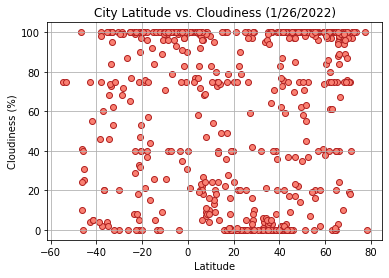

This plot shows the percentage of cloudiness in cities across varied latitudes. There appears to be no correlation here.


In [16]:
plt.scatter(citydf['Lat'], citydf['Cloudiness'], color="salmon", edgecolor="firebrick")
plt.title("City Latitude vs. Cloudiness (1/26/2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig('output_data/plot3.png')
plt.show()
print("This plot shows the percentage of cloudiness in cities across varied\
 latitudes. There appears to be no correlation here.")

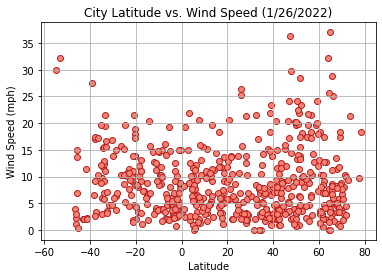

This figure compares wind speed in mph to each city's latitude. While there isn't much correlation between the two, the outliers with the highest windspeeds tend to be at higher latitudes.


In [19]:
plt.scatter(citydf['Lat'], citydf['Wind Speed'], color="salmon", edgecolor="firebrick")
plt.title("City Latitude vs. Wind Speed (1/26/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig('output_data/plot4.png')
plt.show()
print("This figure compares wind speed in mph to each city's latitude. While\
 there isn't much correlation between the two, the outliers with the highest\
 windspeeds tend to be at higher latitudes.")

In [20]:
# Linear Regression

# Create separate dataframes for northern and southern hemisphere data
northdata = citydf[citydf['Lat'] >= 0]
southdata = citydf[citydf['Lat'] < 0]

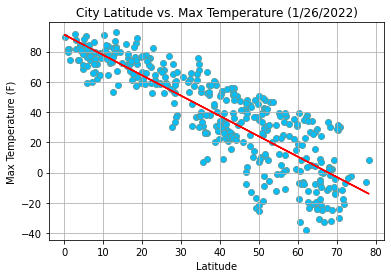

The r-value is: -0.8647387247371169
The linear regression on the graph of city latitude versus maximum temperature shows a strong correlation between the two closer to a latitude of zero, but the maximum temperature varies more widely as the city's latitude is above around 40.


In [22]:
# Northern Hemisphere: Max Temp vs. Latitude Linear Regression

(slope, intercept, rvalue, pvalue, stderr) = linregress(northdata['Lat'], northdata['Max Temp'])
regress_values = northdata['Lat'] * slope + intercept

plt.scatter(northdata['Lat'], northdata['Max Temp'], color="deepskyblue", edgecolor="cadetblue")
plt.plot(northdata['Lat'],regress_values,"r-")
plt.title("City Latitude vs. Max Temperature (1/26/2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig('output_data/plot5.png')
plt.show()
print(f"The r-value is: {rvalue}")
# Explain what linear regression is modeling - describe relationships noticed
print("The linear regression on the graph of city latitude versus maximum\
 temperature shows a strong correlation between the two closer to a latitude\
 of zero, but the maximum temperature varies more widely as the city's\
 latitude is above around 40.")

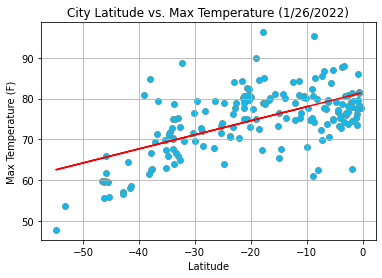

The r-value is: 0.5944660911185845
Linear regression on the southern hemisphere cities, comparing latitude to maximum temperature, does not show a strong correlation between the two. There are too many outliers.


In [24]:
# Southern Hemisphere: Max Temp vs. Latitude Linear Regression

(slope, intercept, rvalue, pvalue, stderr) = linregress(southdata['Lat'], southdata['Max Temp'])
regress_values = southdata['Lat'] * slope + intercept

plt.scatter(southdata['Lat'], southdata['Max Temp'], color="deepskyblue", edgecolor="cadetblue")
plt.plot(southdata['Lat'],regress_values,"r-")
plt.title("City Latitude vs. Max Temperature (1/26/2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig('output_data/plot6.png')
plt.show()
print(f"The r-value is: {rvalue}")
# Explain what linear regression is modeling - describe relationships noticed
print("Linear regression on the southern hemisphere cities, comparing latitude\
 to maximum temperature, does not show a strong correlation between the two.\
 There are too many outliers.")

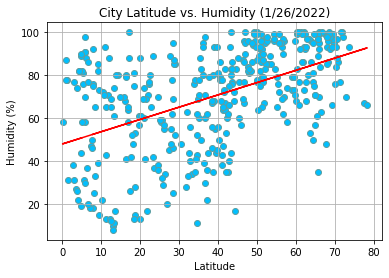

The r-value is: 0.5014521697425521
In the northern hemisphere, cities tend to have humidity higher than 60% across all latitudes graphed, trending higher at higher latitudes.


In [26]:
# Northern Hemisphere: Humidity (%) vs. Latitude Linear Regression

(slope, intercept, rvalue, pvalue, stderr) = linregress(northdata['Lat'], northdata['Humidity'])
regress_values = northdata['Lat'] * slope + intercept

plt.scatter(northdata['Lat'], northdata['Humidity'], color="deepskyblue", edgecolor="cadetblue")
plt.plot(northdata['Lat'],regress_values,"r-")
plt.title("City Latitude vs. Humidity (1/26/2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig('output_data/plot7.png')
plt.show()
print(f"The r-value is: {rvalue}")
# Explain what linear regression is modeling - describe relationships noticed
print("In the northern hemisphere, cities tend to have humidity higher than 60%\
 across all latitudes graphed, trending higher at higher latitudes.")

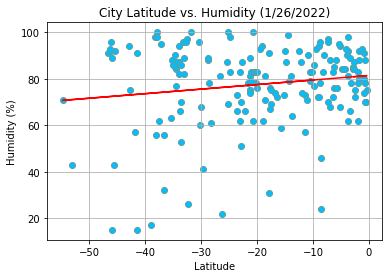

The r-value is: 0.15755662478641436
In the southern hemisphere, cities tend to have humidity higher than 70% across all latitudes graphed, trending higher as latitudes approach the equator.


In [28]:
# Southern Hemisphere: Humidity (%) vs. Latitude Linear Regression

(slope, intercept, rvalue, pvalue, stderr) = linregress(southdata['Lat'], southdata['Humidity'])
regress_values = southdata['Lat'] * slope + intercept

plt.scatter(southdata['Lat'], southdata['Humidity'], color="deepskyblue", edgecolor="cadetblue")
plt.plot(southdata['Lat'],regress_values,"r-")
plt.title("City Latitude vs. Humidity (1/26/2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig('output_data/plot8.png')
plt.show()
print(f"The r-value is: {rvalue}")
# Explain what linear regression is modeling - describe relationships noticed
print("In the southern hemisphere, cities tend to have humidity higher than 70%\
 across all latitudes graphed, trending higher as latitudes approach the equator.")

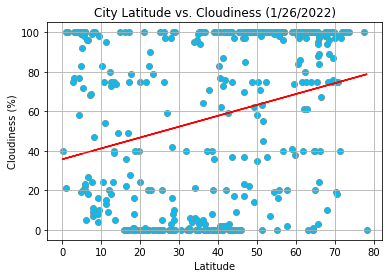

The r-value is: 0.27505358205125335
There seems to be no correlation between city latitude and cloud cover in the northern hemisphere.


In [29]:
# Northern Hemisphere: Cloudiness (%) vs. Latitude Linear Regression

(slope, intercept, rvalue, pvalue, stderr) = linregress(northdata['Lat'], northdata['Cloudiness'])
regress_values = northdata['Lat'] * slope + intercept

plt.scatter(northdata['Lat'], northdata['Cloudiness'], color="deepskyblue", edgecolor="cadetblue")
plt.plot(northdata['Lat'],regress_values,"r-")
plt.title("City Latitude vs. Cloudiness (1/26/2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig('output_data/plot9.png')
plt.show()
print(f"The r-value is: {rvalue}")
# Explain what linear regression is modeling - describe relationships noticed
print("There seems to be no correlation between city latitude and cloud cover\
 in the northern hemisphere.")

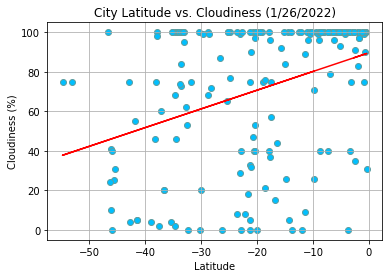

The r-value is: 0.36381381907313626
There seems to be no correlation between city latitude and cloud cover in the southern hemisphere.


In [31]:
# Southern Hemisphere: Cloudiness (%) vs. Latitude Linear Regression

(slope, intercept, rvalue, pvalue, stderr) = linregress(southdata['Lat'], southdata['Cloudiness'])
regress_values = southdata['Lat'] * slope + intercept

plt.scatter(southdata['Lat'], southdata['Cloudiness'], color="deepskyblue", edgecolor="cadetblue")
plt.plot(southdata['Lat'],regress_values,"r-")
plt.title("City Latitude vs. Cloudiness (1/26/2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig('output_data/plot10.png')
plt.show()
print(f"The r-value is: {rvalue}")
# Explain what linear regression is modeling - describe relationships noticed
print("There seems to be no correlation between city latitude and cloud cover\
 in the southern hemisphere.")

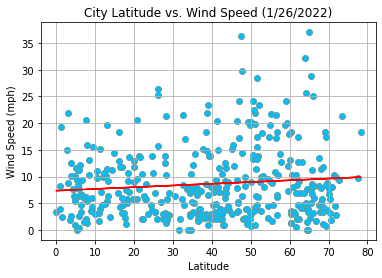

The r-value is: 0.10232556987977008
Wind speed  tends to be lower than 10 mph in the northern hemisphere, with many outliers above 20 mph.


In [32]:
# Northern Hemisphere: Wind Speed (mph) vs. Latitude Linear Regression

(slope, intercept, rvalue, pvalue, stderr) = linregress(northdata['Lat'], northdata['Wind Speed'])
regress_values = northdata['Lat'] * slope + intercept

plt.scatter(northdata['Lat'], northdata['Wind Speed'], color="deepskyblue", edgecolor="cadetblue")
plt.plot(northdata['Lat'],regress_values,"r-")
plt.title("City Latitude vs. Wind Speed (1/26/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig('output_data/plot11.png')
plt.show()
print(f"The r-value is: {rvalue}")
# Explain what linear regression is modeling - describe relationships noticed
print("Wind speed  tends to be lower than 10 mph in the northern hemisphere,\
 with many outliers above 20 mph.")

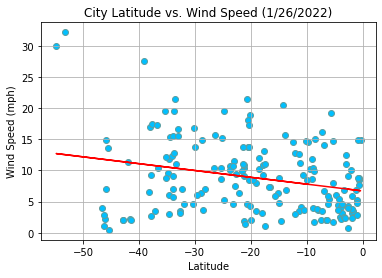

The r-value is: -0.2591112573035523
There doesn't appear to be a strong correlation between wind speed and a city's latitude in the southern hemisphere.


In [33]:
# Southern Hemisphere: Wind Speed (mph) vs. Latitude Linear Regression

(slope, intercept, rvalue, pvalue, stderr) = linregress(southdata['Lat'], southdata['Wind Speed'])
regress_values = southdata['Lat'] * slope + intercept

plt.scatter(southdata['Lat'], southdata['Wind Speed'], color="deepskyblue", edgecolor="cadetblue")
plt.plot(southdata['Lat'],regress_values,"r-")
plt.title("City Latitude vs. Wind Speed (1/26/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig('output_data/plot12.png')
plt.show()
print(f"The r-value is: {rvalue}")
# Explain what linear regression is modeling - describe relationships noticed
print("Wind speeds tend to be  and\
 a city's latitude in the southern hemisphere.")